In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import MOLLI_fit
%matplotlib inline

[0.11168487 0.10991778 0.15117949 0.15885994 0.1602896  0.06979819
 0.11771673 0.15263118]


4096it [00:01, 3403.04it/s]


[[2.30671113 2.30671167 2.30671108 ... 2.30671174 2.30671118 2.30671171]
 [2.30671588 2.30671467 2.30671593 ... 2.30671459 2.30671582 2.30671463]
 [2.30670787 2.30670965 2.30670783 ... 2.30670972 2.30670793 2.30670968]
 ...
 [2.30671556 2.30671443 2.30671551 ... 2.3067145  2.30671561 2.30671446]
 [2.30671014 2.30671112 2.30671023 ... 2.30671099 2.30671006 2.30671105]
 [2.30671267 2.30671268 2.30671275 ... 2.30671257 2.30671258 2.30671262]]


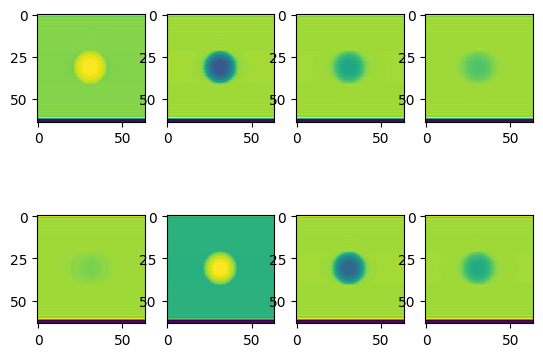

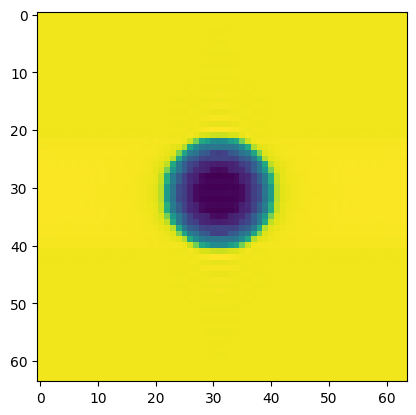

In [2]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array(
        [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../Flow-Bloch-T1-mapping-cpp/img_MOLLI/64x64x64", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

print(MOLLI_readout_img[:, 10, 10])

plt.figure()
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    T1_star, T1, A, B = MOLLI_fit(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)